In [1]:
import os
import numpy as np
import pandas as pd
import finance as fin
import reinforcement_learning as rl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''testing the policy update method'''
pi = rl.policy(sa_dict=dict())

s1 = rl.state(stock_name="GSPC", qty=1, close_sma_ratio=3, price_bb_ratio=3, momentum=7, total_return=3)
a1 = 0
q1 = rl.Q(s=s1, a=a1)
q1.value = 1
pi.update(s=s1, a=a1, q=q1)
q1.value = 1.3
pi.update(s=s1, a=a1, q=q1)

s2 = s1
a2 = 1
q2 = rl.Q(s=s2, a=a2)
q2.value = 2
pi.update(s=s2, a=a2, q=q2)

for a, q in pi.sa_dict[s2]:
    print("a=%s: Q=%s" % (a, q.value))
pi.get_maxQ_action(s1)

a=-1: Q=0
a=-0.5: Q=0
a=0: Q=1.3
a=0.5: Q=0
a=1: Q=2


1

In [2]:
'''load data'''
symbols = ['GSPC', 'DJI', 'MSFT', 'GOOGL', 'XOM', 'BAC', 'AAPL', 'JNJ', 'AMZN', 'IBM', 'KO', 'WMT']
dates = pd.date_range('2005-07-09', '2017-10-30')
df = fin.get_data(symbols, dates)
print("entire set:" , df.shape)

'''separate dataframe into training and test sets''' 
train_df = df[:][:2700]
test_df = df[:][2700:]
print("train set:" , train_df.shape)
print("test set:" , test_df.shape)

'''
indicates the start_index in the train_df
the first 100 items are used for calculating technical indicators 
such as 20 days simple moving average, momentum, etc.
'''
start_index = 100 

entire set: (3100, 12)
train set: (2700, 12)
test set: (400, 12)


In [3]:
'''calculate 4-day momentum dataframe from training set'''
n_days = 20
ds_list = list()
for symbol in symbols:
    ds_list.append(pd.Series(fin.get_discrete_momentum_series(train_df[symbol][start_index-n_days:], n_days), name=symbol))
    
d_momentum_df = pd.concat(ds_list, axis=1)
print(d_momentum_df.shape)
d_momentum_df.head()

(2600, 12)


,GSPC,DJI,MSFT,GOOGL,XOM,BAC,AAPL,JNJ,AMZN,IBM,KO,WMT
0,8,8,8,7,6,7,9,4,9,9,4,7
1,8,8,8,8,7,7,9,5,9,9,5,5
2,8,7,8,8,5,7,9,4,9,8,5,5
3,7,7,7,6,6,7,9,5,9,8,5,3
4,7,6,6,5,8,7,9,2,9,8,5,3


In [4]:
'''calculate the price to 20-day sma (simple moving average) ratio dataframe from training set'''
n_days = 20
ds_list = list()
for symbol in symbols:
    ds_list.append(pd.Series(fin.get_discrete_price_sma_series(train_df[symbol][start_index-n_days:], n_days), name=symbol))
    
d_price_sma_df = pd.concat(ds_list, axis=1)
print(d_price_sma_df.shape)
d_price_sma_df.head()

(2600, 12)


,GSPC,DJI,MSFT,GOOGL,XOM,BAC,AAPL,JNJ,AMZN,IBM,KO,WMT
0,2,1,2,1,0,8,0,0,1,1,0,1
1,2,2,2,1,0,8,0,0,1,1,0,1
2,2,2,2,1,0,8,0,0,1,1,0,1
3,2,1,2,1,0,8,0,0,1,0,0,0
4,2,2,2,1,0,8,0,0,1,1,0,0


In [5]:
'''calculate the price to 20-day bollinger band ratio dataframe from training set '''
n_days = 20
ds_list = list()
for symbol in symbols:
    ds_list.append(pd.Series(fin.get_discrete_price_bb_series(train_df[symbol][start_index-n_days:], n_days), name=symbol))
    
d_price_bb_df = pd.concat(ds_list, axis=1)
print(d_price_bb_df.shape)
d_price_bb_df.head()

(2600, 12)


,GSPC,DJI,MSFT,GOOGL,XOM,BAC,AAPL,JNJ,AMZN,IBM,KO,WMT
0,2,1,2,1,0,8,0,0,1,1,0,1
1,2,2,2,1,0,8,0,0,1,1,0,1
2,2,2,2,1,0,8,0,0,1,1,0,1
3,2,1,2,1,0,8,0,0,1,0,0,0
4,2,2,2,1,0,8,0,0,1,1,0,0


In [6]:
# TEST
'''
capital = 1000000
max_alloc = capital/10
h = fin.portfolio(capital=capital, max_alloc=max_alloc)
h.execute_action(0.5, "GOOGL", 1)
h.execute_action(1, "GOOGL", 23)
h.execute_action(0.5, "GOOGL", 32)
h.execute_action(0.5, "GOOGL", 2)
print("GOOGL bv: " , h.get_book_value("GOOGL"))
                    
h.execute_action(-0.5, "GOOGL", 200)
h.execute_action(1, "GOOGL", 23)
h.execute_action(0.5, "GOOGL", 876)
print("GOOGL bv: " , h.get_book_value("GOOGL"))
print(h.get_allowed_actions("GOOGL", 876))
'''

'\ncapital = 1000000\nmax_alloc = capital/10\nh = fin.portfolio(capital=capital, max_alloc=max_alloc)\nh.execute_action(0.5, "GOOGL", 1)\nh.execute_action(1, "GOOGL", 23)\nh.execute_action(0.5, "GOOGL", 32)\nh.execute_action(0.5, "GOOGL", 2)\nprint("GOOGL bv: " , h.get_book_value("GOOGL"))\n                    \nh.execute_action(-0.5, "GOOGL", 200)\nh.execute_action(1, "GOOGL", 23)\nh.execute_action(0.5, "GOOGL", 876)\nprint("GOOGL bv: " , h.get_book_value("GOOGL"))\nprint(h.get_allowed_actions("GOOGL", 876))\n'

In [6]:
'''create a portfolio object to keep track of our holdings'''
capital = 100000
max_alloc = capital/10
holdings = fin.portfolio(capital=capital, max_alloc=max_alloc)
symbol = "GSPC"

# Q(s,a) table key = <s,a> pair, value = Q value(s,a) value 
Qt = rl.Qtable(init_alpha=0.3, min_alpha=0.1, gamma=0.7)

# policy
pi = rl.policy(init_epsilon=0.5, min_epsilon=0.1)

px = list()
py = list()
rand_s = rl.state()
rand_a = 0

In [ ]:

stock_price = train_df[symbol][start_index]  
# get state s1
s1 = rl.state(stock_name=symbol, 
              qty=holdings.get_qty(symbol), 
              close_sma_ratio=d_price_sma_df[symbol][0],
              price_bb_ratio=d_price_bb_df[symbol][0], 
              momentum=d_momentum_df[symbol][0], 
              total_return=holdings.discrete_return(symbol, stock_price))
a1 = 0
s2 = rl.state()
r = 0

# Train our rl algorithm to converge our Q values
for epoch in range(10000, 30000):        
    
    # record data for plotting and print progress
    if (epoch % 100 == 0 and epoch > 0):
        if (rand_s.stock_name == ""):
            rand_s = s1
            rand_a = a1
                
        px.append(epoch)
        py.append(Qt.get_Q(rand_s, rand_a).value)
            
        if (epoch % 100 == 0):
            print("epoch ", epoch)  
            
    for i in range(len(train_df[symbol][start_index:])-1):
    #for i in range(len(train_df[symbol][start_index:start_index+2])):

        stock_price = train_df[symbol][start_index+i]
        
        '''
        # get state s1
        s1 = rl.state(stock_name=symbol, 
                      qty=holdings.get_qty(symbol), 
                      close_sma_ratio=d_price_sma_df[symbol][i],
                      price_bb_ratio=d_price_bb_df[symbol][i], 
                      momentum=d_momentum_df[symbol][i], 
                      total_return=holdings.discrete_return(symbol, stock_price))
        '''
        '''
        print(s1.stock_name)
        print(s1.close_sma_ratio)
        print(s1.price_bb_ratio)
        print(s1.momentum)
        print(s1.total_return)
        '''

        # choose action to take in state s1
        allowed_actions = holdings.get_allowed_actions(symbol, stock_price)
        a1 = pi.get_action(s=s1, epoch=epoch, allowed_actions=allowed_actions)
        r = holdings.execute_action(a1, symbol, stock_price)
        #print("a1:" , a1)

        # get state s2
        s2 = rl.state(stock_name=symbol, 
                      qty=holdings.get_qty(symbol), 
                      close_sma_ratio=d_price_sma_df[symbol][i+1],
                      price_bb_ratio=d_price_bb_df[symbol][i+1], 
                      momentum=d_momentum_df[symbol][i+1], 
                      total_return=holdings.discrete_return(symbol, stock_price))

        # get reward from executing action a in s1 and transitioning to s2
        # the reward is the total realized return
        #r = holdings.get_realized_return(symbol)
        #print("r:" , r)

        # create expericne tuple <s1,a1,s2,r>
        exp = rl.experience(s1, a1, s2, r)

        #print("Q(s1,a1) before update: ", Qt.get_Q(s1, a1).value)
        # update Q(s1,a1) using <s1,a1,s2,r>
        Qt.update(exp=exp, pi=pi, epoch=epoch)
        #print("Q(s1,a1) after update: ", Qt.get_Q(s1, a1).value)

        # update the policy with our updated Q(s1,a1) value
        pi.update(s1, a1, Qt.get_Q(s1, a1))
        
        s1 = s2
    

epoch  10000
epoch  10100
epoch  10200
epoch  10300
epoch  10400
epoch  10500
epoch  10600
epoch  10700
epoch  10800
epoch  10900
epoch  11000
epoch  11100
epoch  11200
epoch  11300
epoch  11400
epoch  11500
epoch  11600
epoch  11700
epoch  11800
epoch  11900
epoch  12000
epoch  12100
epoch  12200
epoch  12300
epoch  12400
epoch  12500
epoch  12600
epoch  12700
epoch  12800
epoch  12900
epoch  13000
epoch  13100
epoch  13200
epoch  13300
epoch  13400
epoch  13500
epoch  13600
epoch  13700
epoch  13800
epoch  13900
epoch  14000
epoch  14100
epoch  14200
epoch  14300
epoch  14400
epoch  14500
epoch  14600
epoch  14700
epoch  14800
epoch  14900
epoch  15000
epoch  15100
epoch  15200
epoch  15300
epoch  15400
epoch  15500
epoch  15600
epoch  15700
epoch  15800
epoch  15900
epoch  16000
epoch  16100
epoch  16200
epoch  16300
epoch  16400
epoch  16500
epoch  16600
epoch  16700
epoch  16800
epoch  16900
epoch  17000
epoch  17100
epoch  17200
epoch  17300
epoch  17400
epoch  17500
epoch  17600

alpha:  0.20001
epsilon:  0.1
random state: 19985
random action:  1


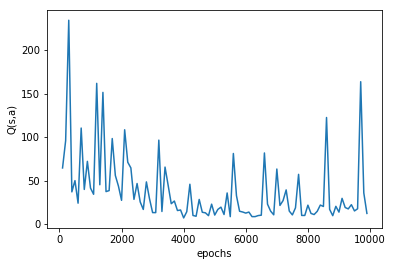

In [8]:
print("alpha: " , max(Qt.min_alpha, Qt.init_alpha-(epoch/1e5)))
print("epsilon: ", max(pi.min_epsilon, pi.init_epsilon-(epoch/1e4)))
print("random state:", rand_s.value())
print("random action: ", rand_a)
plt.plot(px,py)
plt.xlabel('epochs')
plt.ylabel('Q(s,a)')
plt.show()

In [9]:
i = 0
aq_dict = dict()
print("Qtable size:", len(Qt.table))
s = rl.state(stock_name="GSPC", qty=1, close_sma_ratio=3, price_bb_ratio=3, momentum=7, total_return=3)
print("s=" , s.value())
for key in Qt.table:
    if (Qt.table[key].s.value() == s.value()):   
        aq_dict[Qt.table[key].a] = Qt.table[key].value
sorted_aq = [(k, aq_dict[k]) for k in sorted(aq_dict, key=aq_dict.get, reverse=True)]
for k, v in sorted_aq:
    print("a=%s: Q=%s" % (k, v))

best_action = pi.get_maxQ_action(s)
print("best action:", best_action)
for a, Q in pi.sa_dict[s]:
    print("a=%s: Q=%s" % (a, Q.value))

Qtable size: 2463
s= 13373
a=1: Q=2.45018014447
a=0.5: Q=1.81005109232
a=0: Q=1.78362791691
a=-1: Q=-6.43686200549
a=-0.5: Q=-17.8643326576
best action: 1
a=-1: Q=-6.43686200549
a=-0.5: Q=-17.8643326576
a=0: Q=1.78362791691
a=0.5: Q=1.81005109232
a=1: Q=2.45018014447


In [10]:
'''create a portfolio object to keep track of our holdings'''
train_holdings = fin.portfolio(capital=capital, max_alloc=max_alloc)
nonzero_actions = 0
zero_actions = 0
for i in range(len(train_df[symbol][start_index:])-1):
#for i in range(offset, len(train_df[symbol][start_index:start_index+offset+2])):
        stock_price = train_df[symbol][start_index+i]
        
        # get state s1
        s1 = rl.state(stock_name=symbol, 
                      qty=train_holdings.get_qty(symbol), 
                      close_sma_ratio=d_price_sma_df[symbol][i],
                      price_bb_ratio=d_price_bb_df[symbol][i], 
                      momentum=d_momentum_df[symbol][i], 
                      total_return=train_holdings.discrete_return(symbol, stock_price))
        '''
        print(s1.stock_name)
        print(s1.close_sma_ratio)
        print(s1.price_bb_ratio)
        print(s1.momentum)
        print(s1.total_return)
        '''
        # choose action to take in state s1
        #allowed_actions = train_holdings.get_allowed_actions(symbol, stock_price)
        a1 = pi.get_maxQ_action(s=s1)
        if (a1!=0):
            print("best action: ", a1)
            nonzero_actions += 1
        else:
            zero_actions += 1
            
        train_holdings.execute_action(a1, symbol, stock_price)

print("non-zero action count: ", nonzero_actions)
print("zero action count: ", zero_actions)
train_holdings.get_realized_return(symbol)

best action:  0.5
best action:  0.5
best action:  0.5
best action:  -0.5
best action:  -0.5
best action:  -1
best action:  1
best action:  -0.5
best action:  -0.5
best action:  1
best action:  1
best action:  0.5
best action:  0.5
best action:  1
best action:  1
best action:  -1
best action:  1
best action:  0.5
best action:  1
best action:  -1
best action:  0.5
best action:  -0.5
best action:  -0.5
best action:  1
best action:  0.5
best action:  0.5
best action:  1
best action:  1
best action:  1
best action:  1
best action:  0.5
best action:  -1
best action:  0.5
best action:  0.5
best action:  -1
best action:  1
best action:  0.5
best action:  0.5
best action:  0.5
best action:  1
best action:  1
best action:  1
best action:  1
best action:  1
best action:  1
best action:  1
best action:  1
best action:  1
best action:  0.5
best action:  1
best action:  1
best action:  1
best action:  1
best action:  1
best action:  1
best action:  1
best action:  1
best action:  1
best action:  1
b

-2690.270768999997

In [11]:
len(pi.sa_dict)

608

In [61]:
i = 0
aq_dict = dict()
print("Qtable size:", len(Qt.table))
s = rl.state(stock_name="GSPC", qty=1, close_sma_ratio=3, price_bb_ratio=3, momentum=7, total_return=3)
print("s=" , s.value())
for key in Qt.table:
    if (Qt.table[key].s.value() == s.value()):   
        aq_dict[Qt.table[key].a] = Qt.table[key].value
sorted_aq = [(k, aq_dict[k]) for k in sorted(aq_dict, key=aq_dict.get, reverse=True)]
for k, v in sorted_aq:
    print("a=%s: Q=%s" % (k, v))

best_action = pi.get_maxQ_action(s)
print("best action:", best_action)
for a, Q in pi.sa_dict[s]:
    print("a=%s: Q=%s" % (a, Q.value))

Qtable size: 1642
s= 13373
a=0.5: Q=68786679.8652
a=0: Q=68716565.1268
a=-0.5: Q=68715615.4113
a=-1: Q=68697751.8322
a=1: Q=68343710.1863
epsilon:  1
best action: 0.5
a=-1: Q=68697751.8322
a=-0.5: Q=68715615.4113
a=0: Q=68716565.1268
a=0.5: Q=68786679.8652
a=1: Q=68343710.1863


In [114]:
'''calculate 4-day momentum dataframe from test set'''
n_days = 4
ds_list = list()
for symbol in symbols:
    ds_list.append(pd.Series(fin.get_discrete_momentum_series(test_df[symbol][start_index-n_days:], n_days), name=symbol))
    
test_d_momentum_df = pd.concat(ds_list, axis=1)
print(test_d_momentum_df.shape)
test_d_momentum_df.head()

(300, 12)


,GSPC,DJI,MSFT,GOOGL,XOM,BAC,AAPL,JNJ,AMZN,IBM,KO,WMT
0,5,3,5,2,3,5,3,2,3,4,2,1
1,1,1,5,1,2,6,2,1,2,1,2,0
2,1,1,6,2,3,6,1,1,4,2,2,0
3,1,1,5,2,2,8,1,4,6,2,1,0
4,2,2,4,4,5,7,1,5,6,4,2,2


In [115]:
'''calculate the price to 20-day sma (simple moving average) ratio dataframe from test set'''
n_days = 20
ds_list = list()
for symbol in symbols:
    ds_list.append(pd.Series(fin.get_discrete_price_sma_series(test_df[symbol][start_index-n_days:], n_days), name=symbol))
    
test_d_price_sma_df = pd.concat(ds_list, axis=1)
print(test_d_price_sma_df.shape)
test_d_price_sma_df.head()

(300, 12)


,GSPC,DJI,MSFT,GOOGL,XOM,BAC,AAPL,JNJ,AMZN,IBM,KO,WMT
0,2,1,1,1,8,0,0,3,0,5,5,4
1,1,1,1,1,9,0,0,3,0,5,5,4
2,1,1,1,0,8,0,0,3,0,5,5,3
3,1,1,1,1,8,0,0,3,1,4,4,3
4,1,1,1,1,8,0,0,4,1,5,4,3


In [116]:
'''calculate the price to 20-day bollinger band ratio dataframe from test set '''
n_days = 20
ds_list = list()
for symbol in symbols:
    ds_list.append(pd.Series(fin.get_discrete_price_bb_series(test_df[symbol][start_index-n_days:], n_days), name=symbol))
    
test_d_price_bb_df = pd.concat(ds_list, axis=1)
print(test_d_price_bb_df.shape)
test_d_price_bb_df.head()

(300, 12)


,GSPC,DJI,MSFT,GOOGL,XOM,BAC,AAPL,JNJ,AMZN,IBM,KO,WMT
0,2,1,1,1,8,0,0,3,0,5,5,4
1,1,1,1,1,9,0,0,3,0,5,5,4
2,1,1,1,0,8,0,0,3,0,5,5,3
3,1,1,1,1,8,0,0,3,1,4,4,3
4,1,1,1,1,8,0,0,4,1,5,4,3


In [24]:
'''Backtest using the test data using our learned Q values and policy'''


'''create a new portfolio object to keep track of out holdings in testing'''
capital = 100000
max_alloc = capital/10
test_holdings = fin.portfolio(capital=capital, max_alloc=max_alloc)

s1 = rl.state()
a1 = 0
s2 = rl.state()
r = 0
            
for i in range(len(test_df[symbol][start_index:])-1):
    # get stock parameters
    '''
    stock_name = symbol
    qty = h.get_qty(symbol)
    close_sma_ratio = d_price_sma_df[symbol][i]
    price_bb_ratio = d_price_bb_df[symbol][i]
    momentum = d_momentum_df[symbol][i]
    total_return = h.total_return(symbol, train_df[symbol][i])
    '''
    stock_price = test_df[symbol][i]

    # get state s1
    s1 = rl.state(stock_name=symbol, 
                  qty=test_holdings.get_qty(symbol), 
                  close_sma_ratio=test_d_price_sma_df[symbol][i],
                  price_bb_ratio=test_d_price_bb_df[symbol][i], 
                  momentum=test_d_momentum_df[symbol][i], 
                  total_return=test_holdings.discrete_return(symbol, stock_price))
    '''
    print(s1.stock_name)
    print(s1.close_sma_ratio)
    print(s1.price_bb_ratio)
    print(s1.momentum)
    print(s1.total_return)
    '''

    # choose action to take in state s1
    #allowed_actions = test_holdings.get_allowed_actions(symbol, stock_price)
    a1 = pi.get_maxQ_action(s=s1)
    test_holdings.execute_action(a1, symbol, stock_price)
    #print("a1:" , a1)

    '''
    # get state s2
    s2 = rl.state(stock_name=symbol, 
                  qty=test_holdings.get_qty(symbol), 
                  close_sma_ratio=d_price_sma_df[symbol][i+1],
                  price_bb_ratio=d_price_bb_df[symbol][i+1], 
                  momentum=d_momentum_df[symbol][i+1], 
                  total_return=test_holdings.discrete_return(symbol, stock_price))

    # get reward from executing action a in s1 and transitioning to s2
    # the reward is the total realized return
    r = test_holdings.get_realized_return(symbol)
    #print("r:" , r)

    # create expericne tuple <s1,a1,s2,r>
    exp = rl.experience(s1, a1, s2, r)

    #print("Q(s1,a1) before update: ", Qt.get_Q(s1, a1).value)
    # update Q(s1,a1) using <s1,a1,s2,r>
    Qt.update(exp=exp, pi=pi, epoch=None)
    #print("Q(s1,a1) after update: ", Qt.get_Q(s1, a1).value)

    # update the policy with our updated Q(s1,a1) value
    pi.update(s1, a1, Qt.get_Q(s1, a1))
    
    '''
test_holdings.get_realized_return(symbol)   

0

In [25]:
i = 0
aq_dict = dict()
print("Qtable size:", len(Qt.table))
s = rl.state(stock_name="GSPC", qty=1, close_sma_ratio=3, price_bb_ratio=3, momentum=7, total_return=3)
print("s=" , s.value())
for key in Qt.table:
    if (Qt.table[key].s.value() == s.value()):   
        aq_dict[Qt.table[key].a] = Qt.table[key].value
sorted_aq = [(k, aq_dict[k]) for k in sorted(aq_dict, key=aq_dict.get, reverse=True)]
for k, v in sorted_aq:
    print("a=%s: Q=%s" % (k, v))

print("epsilon: " , pi.init_epsilon)
best_action = pi.get_maxQ_action(s)
print("best action:", best_action)
for a, Q in pi.sa_dict[s]:
    print("a=%s: Q=%s" % (a, Q.value))

Qtable size: 1833
s= 13373
a=-0.5: Q=340122456.873
a=0: Q=339602161.686
a=1: Q=338815784.006
a=-1: Q=338804516.454
a=0.5: Q=338584785.793
epsilon:  0
best action: -0.5
a=-1: Q=338804516.454
a=-0.5: Q=340122456.873
a=0: Q=339602161.686
a=0.5: Q=338584785.793
a=1: Q=338815784.006


In [68]:
i = 0
print("Qtable size:", len(Qt.table))
for key in Qt.table:
    print("s=" + str(Qt.table[key].s.value()) + ", a=" + str(Qt.table[key].a) + ", Q=" + str(Qt.table[key].value))
    i += 1
    if (i > 100):
        break

Qtable size: 1815
s=2224, a=0, Q=36822318.3207
s=2234, a=0.5, Q=15081138.2706
s=12255, a=0.5, Q=141948978.253
s=12255, a=-0.5, Q=143761550.463
s=12275, a=0, Q=143906293.769
s=12233, a=0.5, Q=85769940.2011
s=12225, a=-0.5, Q=131402898.516
s=12235, a=-0.5, Q=134097273.697
s=12235, a=0, Q=135713782.662
s=13365, a=1, Q=112413126.816
s=13373, a=-1, Q=24167679.4529
s=3364, a=0, Q=23423153.4094
s=2254, a=0.5, Q=19074862.7413
s=12223, a=-0.5, Q=91261259.1465
s=13345, a=-1, Q=26029740.2669
s=3364, a=1, Q=11496309.6382
s=12233, a=0, Q=85837150.9608
s=12233, a=-1, Q=32412450.2448
s=2214, a=1, Q=49801158.7776
s=13363, a=0, Q=48054404.2182
s=13375, a=-1, Q=27333481.3259
s=3374, a=0, Q=22707343.3086
s=3394, a=0, Q=22500555.3043
s=3384, a=0.5, Q=11107231.7412
s=13375, a=-0.5, Q=96933892.0334
s=13383, a=-0.5, Q=46422156.3023
s=13345, a=0.5, Q=116426614.096
s=13335, a=0, Q=98506019.5655
s=13333, a=-1, Q=30847495.0822
s=3324, a=0.5, Q=11615051.0736
s=13345, a=-0.5, Q=102325436.082
s=12213, a=0.5, Q=8636